In [10]:
#modulse/libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#reading csv files
path = "/content/drive/MyDrive/datasets/weather_forecast.csv"
df = pd.read_csv(path)
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [20]:
#check data type of contents
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy          object
Play           object
dtype: object

In [12]:
#encord strings to numericals
Numerics = LabelEncoder()

In [13]:
#drop the target variable and make it as nerw frame
inputs = df.drop('Play',axis = 'columns')
target = df['Play']
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [14]:
#replace string columns to numbers
inputs['Outlook_n'] = Numerics.fit_transform(inputs['Outlook'])
inputs['Temperature_n'] = Numerics.fit_transform(inputs['Temperature'])
inputs['Humidity_n'] = Numerics.fit_transform(inputs['Humidity'])
inputs['Windy_n'] = Numerics.fit_transform(inputs['Windy'])
inputs

,Outlook,Temperature,Humidity,Windy,Outlook_n,Temperature_n,Humidity_n,Windy_n
0,Sunny,Hot,High,Weak,2,1,0,1
1,Sunny,Hot,High,Strong,2,1,0,0
2,Overcast,Hot,High,Weak,0,1,0,1
3,Rain,Mild,High,Weak,1,2,0,1
4,Rain,Cool,Normal,Weak,1,0,1,1
5,Rain,Cool,Normal,Strong,1,0,1,0
6,Overcast,Cool,Normal,Strong,0,0,1,0
7,Sunny,Mild,High,Weak,2,2,0,1
8,Sunny,Cool,Normal,Weak,2,0,1,1
9,Rain,Mild,Normal,Weak,1,2,1,1


In [15]:
#droping the string values
inputs_n= inputs.drop(['Outlook','Temperature','Humidity','Windy'],axis = 'columns')
inputs_n

,Outlook_n,Temperature_n,Humidity_n,Windy_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [16]:
#applying Gaussian Naive bayes
Classifier = GaussianNB()
Classifier.fit(inputs_n,target)


GaussianNB()

In [17]:
Classifier.score(inputs_n,target)

0.9285714285714286

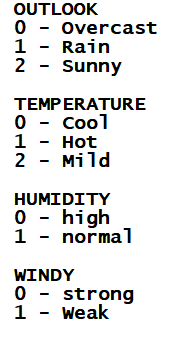

In [21]:
#prediction
Classifier.predict([[2,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')